In [3]:
# Load the libraries
library(tidyverse)
library(infer)
library(palmerpenguins)

In [4]:
penguins |> 
    slice_sample(n = 10)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,45.1,14.5,207,5050,female,2007
Adelie,Biscoe,38.8,17.2,180,3800,male,2007
Adelie,Torgersen,38.7,19.0,195,3450,female,2007
Chinstrap,Dream,49.7,18.6,195,3600,male,2008
Gentoo,Biscoe,46.1,15.1,215,5100,male,2007
Adelie,Torgersen,40.9,16.8,191,3700,female,2008
Gentoo,Biscoe,50.4,15.7,222,5750,male,2009
Chinstrap,Dream,45.7,17.0,195,3650,female,2009
Gentoo,Biscoe,48.2,14.3,210,4600,female,2007


In [5]:
# Let's remove the NAs (don't do this in practice)
penguins_clean <-
    penguins |>
    filter(!is.na(body_mass_g))
    

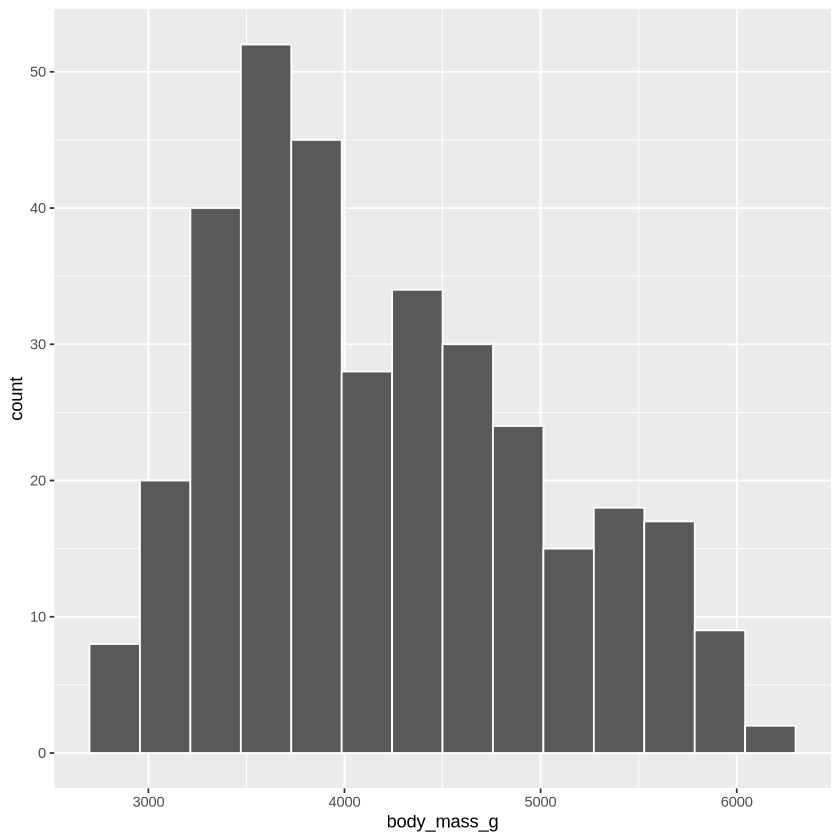

In [10]:
# Let's take a look at the sample distribution
penguins_clean |>
    ggplot() +
    geom_histogram(aes(body_mass_g), color = 'white', bins = 15)

In [11]:
# Let's get the point estimate
penguins_clean |>
    summarise(avg_body_mass = mean(body_mass_g))

avg_body_mass
<dbl>
4201.754


In [13]:
# Obtaining the bootstrap_distribution
boot_dist <-
    penguins_clean |>
    rep_sample_n(reps = 5000, size = nrow(penguins_clean), replace = TRUE) |>
    group_by(replicate) |>
    summarise(avg_body_mass_g = mean(body_mass_g))

In [14]:
boot_dist |>
    slice_sample(n = 10)

replicate,avg_body_mass_g
<int>,<dbl>
1823,4204.605
4750,4202.120
2659,4277.924
2506,4230.336
4042,4189.985
3478,4235.892
3770,4264.547
1217,4200.219
4834,4207.529


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


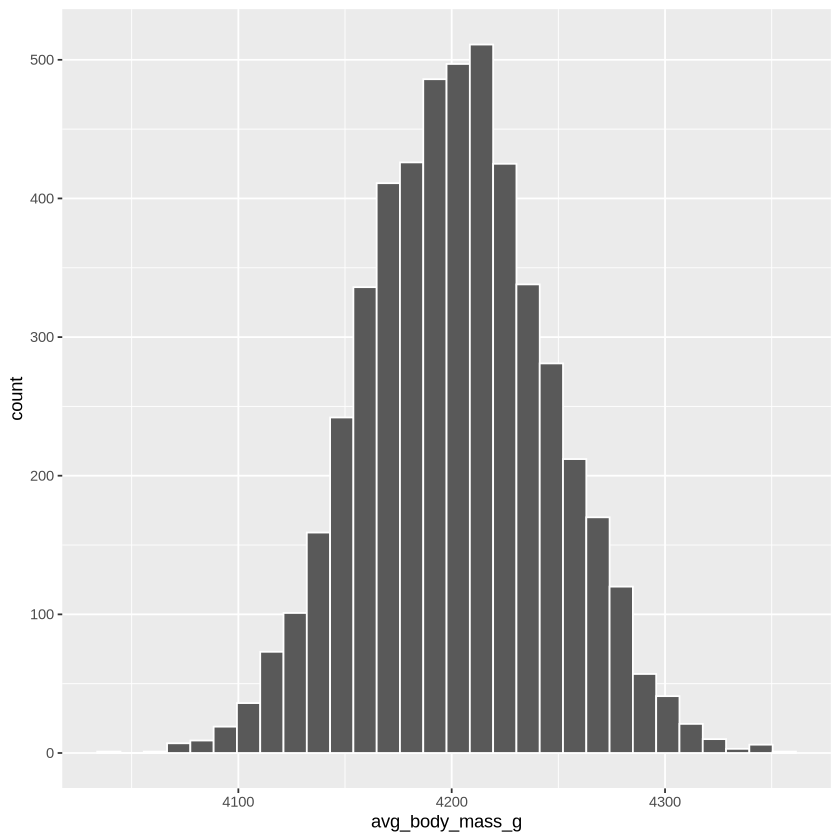

In [15]:
# Plotting the bootstrap distribution
boot_dist |>
    ggplot() +
    geom_histogram(aes(avg_body_mass_g), color = 'white')

In [19]:
# Getting the confidence interval
boot_dist |>
    ungroup() |>
    summarise(lower_bound = quantile(avg_body_mass_g, 0.05),
              upper_bound = quantile(avg_body_mass_g, 0.95))

lower_bound,upper_bound
<dbl>,<dbl>
4132.734,4274.854


## Let's change the code above to the `infer` workflow

In [22]:
penguins_clean |>
    specify(response = body_mass_g) |> # This line specifies the variable of interest
    calculate(stat = 'mean') # This calculates the statistic


stat
<dbl>
4201.754


In [25]:
# Generating a bootstrap distribution
boot_dist_infer <-
    penguins_clean |>
    specify(response = body_mass_g) |> # This line specifies the variable of interest
    generate(reps = 5000, type = 'bootstrap') |> # this generate bootstrap samples
    calculate(stat = 'mean')

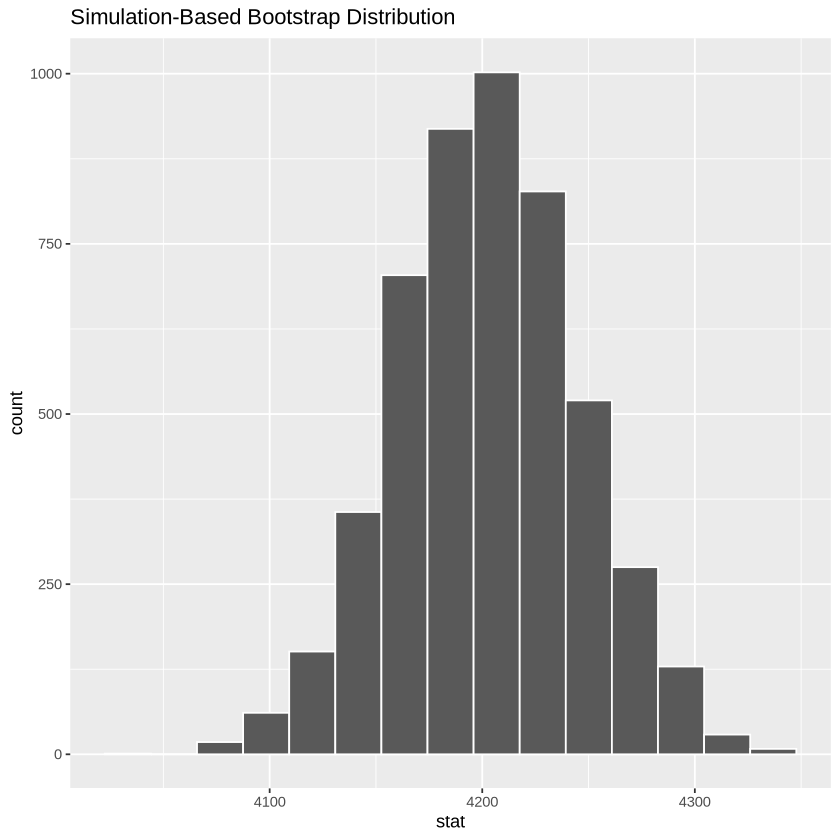

In [26]:
visualize(boot_dist_infer)

In [28]:
conf_int <-
    boot_dist_infer |>
    get_ci(level = 0.9, type = 'percentile')

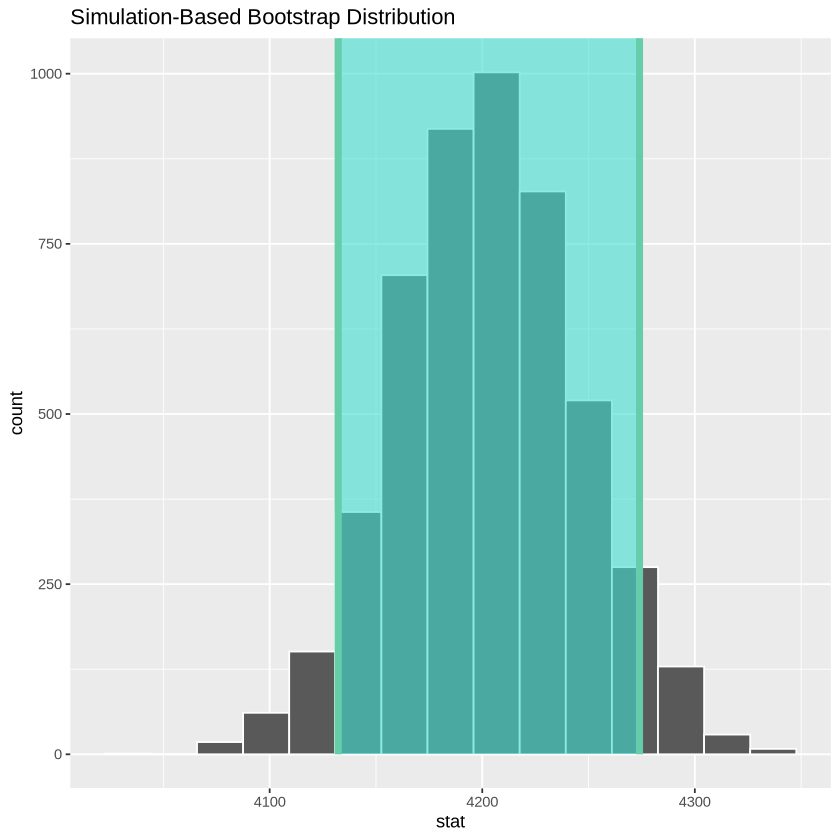

In [29]:
visualise(boot_dist_infer) + shade_confidence_interval(endpoints = conf_int)


In [30]:
conf_int

lower_ci,upper_ci
<dbl>,<dbl>
4132.237,4273.977
